In [2]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots 
import matplotlib.pyplot as plt
import seaborn as sns  # Assuming you're using Seaborn for styling
import os


import statsmodels.api as sm

from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)


## Application Exercises for Chapter 3
09/10/2024

This question involves the use of simple linear regression on the Auto
data set.

8.a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. 
Use the summarize() function to print the results. Comment on the output. 

For example:
i. Is there a relationship between the predictor and the response?

ii. How strong is the relationship between the predictor and the response?

iii. Is the relationship between the predictor and the response positive or negative?

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confdence and prediction
intervals?

(b) Plot the response and the predictor in a new set of axes ax. 
Use the ax.axline() method or the abline() function defned in the
lab to display the least squares regression line.

(c) Produce some of diagnostic plots of the least squares regressio i
ft as described in the lab. Comment on any problems you see
with thie ft.

In [3]:
import os
Auto = load_data("Auto")
Auto.columns
X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),
                  'horsepower': Auto['horsepower']})
print(X)
#print(Auto.filepath)  # If such an attribute exists


                           intercept  horsepower
name                                            
chevrolet chevelle malibu        1.0         130
buick skylark 320                1.0         165
plymouth satellite               1.0         150
amc rebel sst                    1.0         150
ford torino                      1.0         140
...                              ...         ...
ford mustang gl                  1.0          86
vw pickup                        1.0          52
dodge rampage                    1.0          84
ford ranger                      1.0          79
chevy s-10                       1.0          82

[392 rows x 2 columns]


In [4]:
y= Auto['mpg']
model = sm.OLS(y, X).fit()

results = model
summarize(model)
model.summary()
#summarize(model)
#model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           7.03e-81
Time:                        17:20:55   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(i)There is a signficant relationship of mpg and horsepower, with P-values being close to zero or is 0, we can reject the null hypothesis.For
every unit increase in horsepower, mpg reduces by0.1578 (a negativ 
relationship).

(ii)The $R^2$ statistic is 0.61, and this means 60% of variance in mpg can be explained by horsepower in this model. To calculate the residual error relative to the response we use the mean of mpg and the RSE. The mean of mpg is ``r mean(Auto$mpg, na.rm=T)``.The RSE was 4.906 which indicates a percentage error of``r 4.906/mean(Auto$mpg, na.rm=T) * 100.0``%. The relationship between mpg and horsepower is reasonably strong.


In [5]:
#Alternative way to model this
#model = sm.OLS(y, X).fit()
#new_data = pd.DataFrame({'horsepower': [98]})
#predicted_mpg = model.predict(new_data)
#print(predicted_mpg)

design = MS(['horsepower'])
X = design.fit_transform(Auto)

rse = model.mse_resid**0.5
print("Residual Standard Error (RSE):", rse)

percentage_error = (rse / np.mean(Auto['mpg'])) * 100.0
print("Percentage Error:", percentage_error)



Residual Standard Error (RSE): 4.90575691954594
Percentage Error: 20.923714066914833


In [6]:
new_df = pd.DataFrame({'horsepower':[75,98, 125]})

newhp = design.transform(new_df)
newhp

new_predictions = model.get_prediction(newhp);
new_predictions.predicted_mean

array([28.09750602, 24.46707715, 20.20526935])

In [7]:
print("Confidence Interval @ 95%")
new_predictions.conf_int(alpha=0.05)


Confidence Interval @ 95%


array([[27.48368703, 28.71132501],
       [23.97307896, 24.96107534],
       [19.65300004, 20.75753866]])

In [8]:
print("Prediction Interval  @ 95%")

PI95=new_predictions.conf_int(obs=True, alpha=0.05)

print(PI95)
PI95[0,0]
(PI95[(1,1)]+PI95[1,0])/2

Prediction Interval  @ 95%
[[18.43295516 37.76205688]
 [14.80939607 34.12475823]
 [10.54443238 29.86610633]]


24.467077152512427

The 95% confidence interval associated with an horsepower value of 98 is (23.97307896, 24.96107534]), and the 95% prediction interval is (14.80939607 34.12475823]). As expected, the confidence and prediction intervals are centered around the same point (a predicted value of 24.4670 for mpg when horsepower equals 98), but the latter are substantially wider.

In [9]:
#8IVb
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim, *args, **kwargs)

model.params.index


Index(['intercept', 'horsepower'], dtype='object')

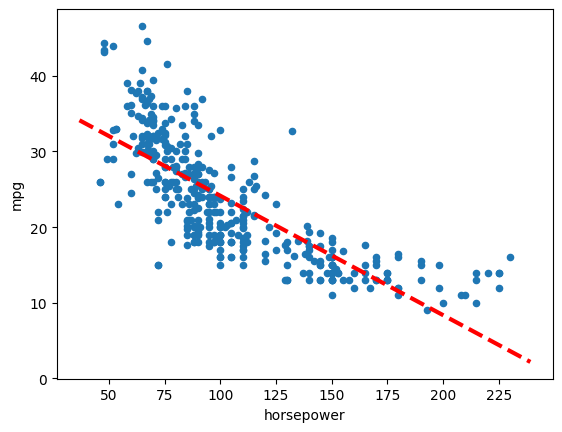

In [10]:
#8IVb
ax = Auto.plot.scatter('horsepower', 'mpg')
abline(ax,
       model.params.iloc[0],
       model.params.iloc[1],    
       #results.iloc[0],
       #results.iloc[1],
       'r--',
       linewidth=3)

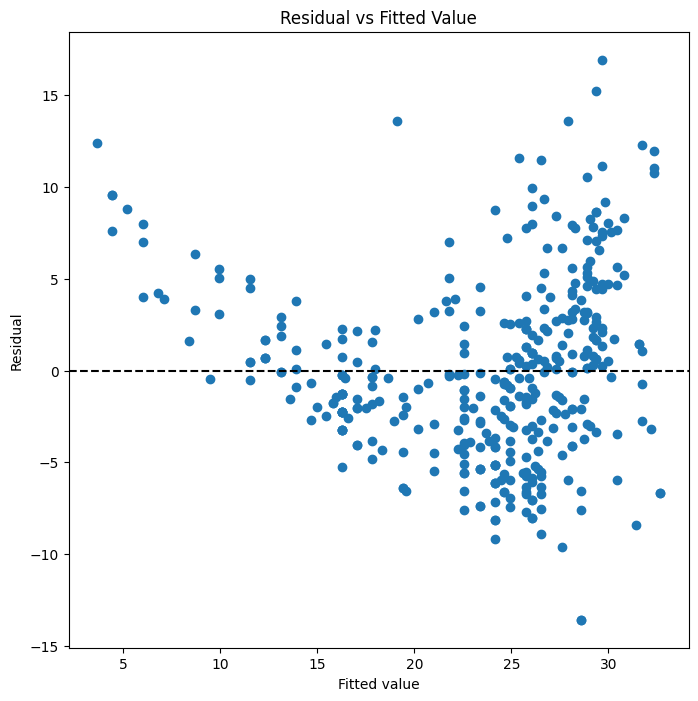

In [11]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot of fitted values vs. residuals
ax.scatter(model.fittedvalues, model.resid)

# Set labels and add a horizontal line
ax.set_title('Residual vs Fitted Value')
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')

ax.axhline(0, color='k', linestyle='--')

# Show the plot
plt.show()

Interpretation of a U-Shaped Pattern
Indication of Non-Linearity:

Pattern Description: The residuals forming a U-shape suggest that there is a systematic non-linear relationship between the independent and dependent variables that your current model isn’t capturing. The model might be too simple and unable to account for the curvature in the data.
Close to the X-Axis:

We can observed the groupings of the majority of residuals close to x-axis (zero), but still exhibit a curvature that calls for some signs of non-linearity.

Index:  115
Max Leverage Value:  0.029753001790921444


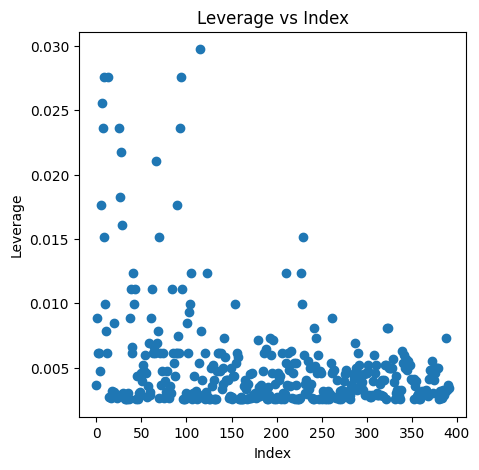

In [12]:
infl = results.get_influence()

ax = subplots(figsize=(5,5))[1]

ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_title('Leverage vs Index')
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
max=np.argmax(infl.hat_matrix_diag)
print('Index: ',max)
print('Max Leverage Value: ',infl.hat_matrix_diag[max])


As shown above, most points are gathered near x-axis(0), this indicatese that most data points have low leverage values, it means our predictor values are close to the MEAN of the predictor values. 
Low leverage points have less influsence on the model fit. 
We can also compare Max Leverage Value with our Leverage threshold (2k/n, where k is the no. of predictors (x) and n is the no. of observations) in this case its 2(1)/395

9. This question involves the use of multiple linear regression on the
Auto data set.

    (a). Produce a scatterplot matrix which includes all of the variables in the data set.

    (b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

    (c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the output. For instance:

    i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question

   ii. Which predictors appear to have a statistically signifcant relationship to the response?

   iii. What does the coefcient for the year variable suggest?
        
    (d) Produce some of diagnostic plots of the linear regression ft as described in the lab. Comment on any problems you see with the ft. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?
        
    (e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically signifcant?
        
    (f) Try a few diferent transformations of the variables, such as $log(X)$,$√X$, $X^2$. Comment on your fndings

In [13]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create the scatterplot matrix
#pairplot = sns.pairplot(Auto)

#plt.show()


In [14]:
#axes=pd.plotting.scatter_matrix(Auto, alpha=0.8, figsize=(15, 15), diagonal='kde')
#plt.show()


Matrix of Correlations
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.777618     -0.805127   -0.778427 -0.832244   
cylinders    -0.777618   1.000000      0.950823    0.842983  0.897527   
displacement -0.805127   0.950823      1.000000    0.897257  0.932994   
horsepower   -0.778427   0.842983      0.897257    1.000000  0.864538   
weight       -0.832244   0.897527      0.932994    0.864538  1.000000   
acceleration  0.423329  -0.504683     -0.543800   -0.689196 -0.416839   
year          0.580541  -0.345647     -0.369855   -0.416361 -0.309120   
origin        0.565209  -0.568932     -0.614535   -0.455171 -0.585005   

              acceleration      year    origin  
mpg               0.423329  0.580541  0.565209  
cylinders        -0.504683 -0.345647 -0.568932  
displacement     -0.543800 -0.369855 -0.614535  
horsepower       -0.689196 -0.416361 -0.455171  
weight           -0.416839 -0.309120 -0.585005  
acceleration      1.00000

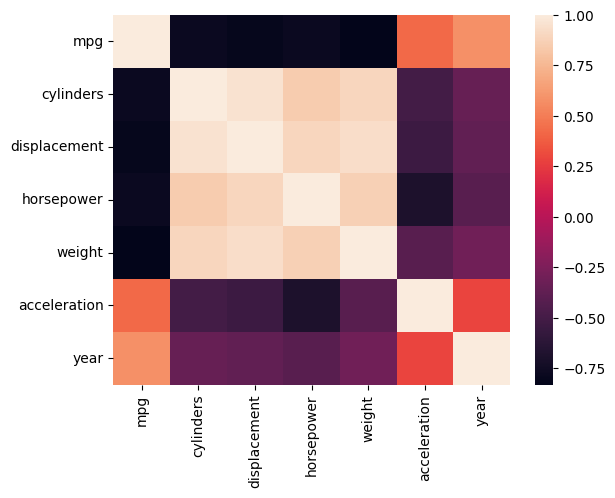

In [15]:
Cor = Auto.corr()
sns.heatmap(Auto.iloc[:,:-1].corr())

print("Matrix of Correlations")
print(Cor)


In [16]:
Auto.reset_index(drop=True, inplace=True)
Xnew = Auto.drop(Auto.columns[0], axis=1)#Auton = Auto.columns.drop('name')
Xn = MS(Xnew).fit_transform(Auto)

#y.reset_index(drop=True, inplace=True)
ynew=y.reset_index(drop=True)
#Xn = MS(Auton).fit_transform(Auto)
print('ynew')
print(ynew)
print('Xn')
print(Xn)

modelm = sm.OLS(ynew, Xn).fit()


summary=modelm.summary()
print(summary)

summarize(modelm)


ynew
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64
Xn
     intercept  cylinders  displacement  horsepower  weight  acceleration  \
0          1.0          8         307.0         130    3504          12.0   
1          1.0          8         350.0         165    3693          11.5   
2          1.0          8         318.0         150    3436          11.0   
3          1.0          8         304.0         150    3433          12.0   
4          1.0          8         302.0         140    3449          10.5   
..         ...        ...           ...         ...     ...           ...   
387        1.0          4         140.0          86    2790          15.6   
388        1.0          4          97.0          52    2130          24.6   
389        1.0          4         135.0          84    2295          11.6   
390        1.0          4         120.0          79

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


9C.I&II)
As we can see from above, relationship between mpg with cylinder, horsepower, and weight are negative relationships which makes sense. Displacement, weight, year and origin all have p-values less than 0.05 or near zero showing the significant relationship and the rejection of null analysis. 
However, p-values of cylinders, horsepower, and acceleration shows larger than 0.05, which makes us question the null hypothesis on these variables.

iii. What does the coefficient for the year variable suggest?
The coefficient for the year is 0.75. This suggested for the mpg of cars seems to be increasing at 0.75 for every year. 


In [17]:
#anova_lm(modelm,model)

modelm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          2.04e-139
Time:                        17:20:56   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
"Question 9(E)"
Xhw = MS(['horsepower','weight',('horsepower','weight')]).fit_transform(Auto)
modelhw = sm.OLS(ynew, Xhw)
print(modelhw.fit().summary())

Xha = MS(['horsepower','acceleration',('horsepower','acceleration')]).fit_transform(Auto)
modelha = sm.OLS(ynew, Xha)
print(modelha.fit().summary())


print("")
Xcd = MS(['cylinders','displacement',('cylinders','displacement')]).fit_transform(Auto)
modelcd = sm.OLS(ynew, Xcd)
print(modelcd.fit().summary())

print("")
Xyo = MS(['year','origin',('year','origin')]).fit_transform(Auto)
modelyo = sm.OLS(ynew, Xyo)
print(modelyo.fit().summary())

print("")
Xcy = MS(['cylinders','year',('cylinders','year')]).fit_transform(Auto)
modelcy = sm.OLS(ynew, Xcy)
print(modelcy.fit().summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          7.26e-116
Time:                        17:20:56   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            63.5579      2.34

9.E) Form above interaction terms, and analysis below, we can see that horsepower has no signficant relationship with mpg, however interaction term of horsepower*acceleration is statistically signficant and this shows that horsepower's response on mpg of the car depends on the acceleration variable.

In [19]:
allvars = list(Auto.columns.drop('mpg'))
final = allvars + [('cylinders', 'displacement'),
                   ('horsepower', 'acceleration'),
                   ('horsepower', 'weight'),
                  ('year','origin'),
                  ('acceleration','year'),('displacement','year')]
Xint = MS(final).fit_transform(Auto)
model_int = sm.OLS(ynew, Xint)
summarize(model_int.fit())

model_int.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     205.1
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          3.64e-162
Time:                        17:20:57   Log-Likelihood:                -952.33
No. Observations:                 392   AIC:                             1933.
Df Residuals:                     378   BIC:                             1988.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
intercept                  92.4792     35.147      2.631      0.009      23.370     161.588
cylinders                  -0.1038      0.497     -0.209      0.835      -1.082       0.874
displacement                0.0074      0.055      0.136      0.892      -0.100       0.115
horsepower                 -0.1922      0.042     -4.629      0.000      -0.274      -0.111
weight                     -0.0094      0.001     -8.815      0.000      -0.011      -0.007
acceleration               -5.6180      1.576     -3.565      0.000      -8.717      -2.519
year                       -0.4372      0.438     -0.999      0.319      -1.298       0.423
origin                     -4.0723      5.126     -0.794      0.427     -14.152       6.007
cylinders:displacement      0.0021      0.002      0.950      0.343      -0.002       0.006
horsepower:acceleration    -0.0015      0.002     -0.757      0.450      -0.005       0.002
horsepower:weight        4.627e-05   7.49e-06      6.177      0.000    3.15e-05     6.1e-05
year:origin                 0.0604      0.066      0.917      0.360      -0.069       0.190
acceleration:year           0.0738      0.020      3.751      0.000       0.035       0.112
displacement:year          -0.0004      0.001     -0.536      0.592      -0.002       0.001
==============================================================================
Omnibus:                       40.718   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.753
Skew:                           0.569   Prob(JB):                     2.39e-19
Kurtosis:                       4.988   Cond. No.                     1.01e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(d) Produce some of diagnostic plots of the linear regression ft as
described in the lab. Comment on any problems you see with the
ft. Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually
high leverage?

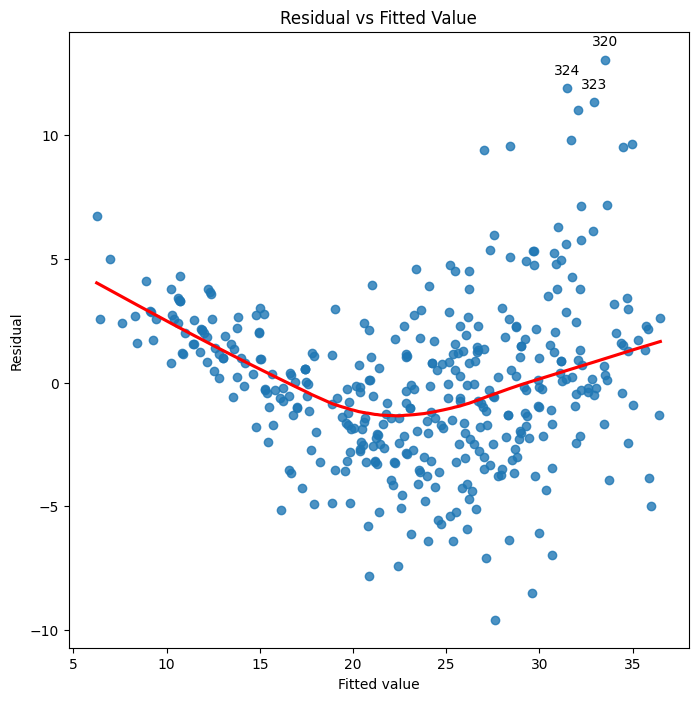

In [20]:
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot of fitted values vs. residuals
sns.regplot(x=modelm.fittedvalues, y=modelm.resid, lowess=True, line_kws={'color': 'red'})

# Set labels and add a horizontal line
ax.set_title('Residual vs Fitted Value')
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')

# Find absolute residuals and sort indices
abs_norm_resid = np.flip(np.argsort(np.abs(modelm.resid)), 0)
abs_norm_resid_top_3 = abs_norm_resid[:3]

# Annotate top 3 residuals
for i in abs_norm_resid_top_3:
    x = modelm.fittedvalues[i]  # Access fitted value for the i-th residual
    y = modelm.resid[i]         # Access residual for the i-th residual
    ax.annotate(i, xy=(x, y), textcoords="offset points", xytext=(0, 10), ha='center')  # Adjust annotation placement

# Show the plot
plt.show()

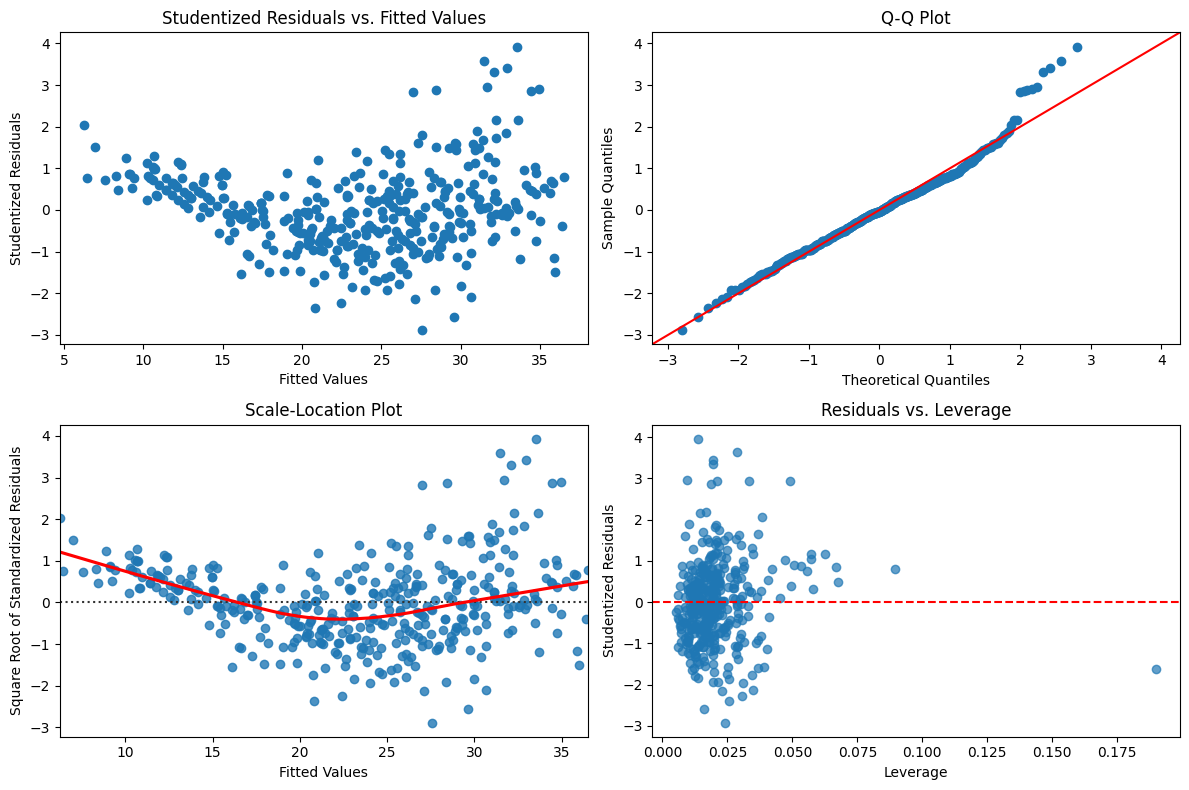

In [21]:

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Studentized Residuals vs. Fitted Values
axes[0, 0].scatter(modelm.fittedvalues, modelm.resid_pearson)
axes[0, 0].set_xlabel("Fitted Values")
axes[0, 0].set_ylabel("Studentized Residuals")
axes[0, 0].set_title("Studentized Residuals vs. Fitted Values")

# Plot 2: Q-Q Plot
sm.qqplot(modelm.resid_pearson, line='45', ax=axes[0, 1])
axes[0, 1].set_title("Q-Q Plot")

# Plot 3: Scale-Location Plot
axes[1, 0] = sns.residplot(x=modelm.fittedvalues, y=modelm.resid_pearson, ax=axes[1, 0], lowess=True, line_kws=dict(color="r"))
#axes[1, 0].scatter(modelm.fittedvalues, np.sqrt(np.abs(model.resid_pearson)))
axes[1, 0].set_xlabel("Fitted Values")
axes[1, 0].set_ylabel("Square Root of Standardized Residuals")
axes[1, 0].set_title("Scale-Location Plot")

# Plot 4: Residuals vs. Leverage
influence = modelm.get_influence()
leverage = influence.hat_matrix_diag
cooks_distance = influence.cooks_distance
studentized_residuals = influence.resid_studentized_internal

# Calculate the threshold for Cook's distance
threshold = 4 / len(modelm.resid_pearson)

# Create a scatter plot with Cook's distance line
axes[1, 1].scatter(leverage, studentized_residuals, alpha=0.7)
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Cook\'s Distance Threshold ({threshold:.2f})')
axes[1, 1].set_xlabel("Leverage")
axes[1, 1].set_ylabel("Studentized Residuals")
axes[1, 1].set_title("Residuals vs. Leverage")

# Adjust spacing
plt.tight_layout()

# Show the plot
plt.show()

9.D) From above diagnostic plots, the residuals vs fitted values plot and its u-shape suggests very little heteroscedasticity.  This means that the variance of the errors (residuals) is not constant across different values of the fitted values. However, this needed little concerned when we observed Scale-Location Plot. QQ plot is very close to ideal with some outliers at the right quantiles. 




(F) Try a few diferent transformations of the variables, such as log(X),√X, X2. Comment on your findings

In [22]:
#Log of X
Xn_log = np.log(Xn)
Xn_log = sm.add_constant(Xn_log)

model_log = sm.OLS(ynew, Xn_log).fit()

summary_log=model_log.summary()
print(summary_log)
summarize(model_log)
#Sqrt of X
Xn_sq=np.sqrt(Xn)
model_sq = sm.OLS(ynew, Xn_sq).fit()

summary_sq=model_sq.summary()
print(summary_sq)
summarize(model_sq)

#X^2 
Xn_s2=Xn*Xn
model_s2 = sm.OLS(ynew, Xn_s2).fit()

summary_s2=model_s2.summary()
print(summary_s2)
summarize(model_s2)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          6.67e-153
Time:                        17:20:57   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -66.5643     17.505     -3.803   

,coef,std err,t,P>|t|
intercept,1.208000e+00,2.356000e+00,0.513,0.608
cylinders,-8.830000e-02,2.500000e-02,-3.502,0.001
displacement,5.680000e-05,1.380000e-05,4.109,0.000
horsepower,-3.621000e-05,4.980000e-05,-0.728,0.467
weight,-9.351000e-07,8.980000e-08,-10.416,0.000
acceleration,6.300000e-03,3.000000e-03,2.334,0.020
year,5.000000e-03,0.000000e+00,14.160,0.000
origin,4.129000e-01,6.900000e-02,5.971,0.000


9F.)From the log(X) transfomration, the p-values for cylinders and displacements are large. Acceleration's p-value is large in the sqrt(X) transformation. The p-value for horsepower is large in the presence of the squared of X transformation.

10. This question should be answered using the **Carseats** data set.  
(a) Fit a multiple regression model to predict **Sales* using *Price*,
*Urban*, and *US*

In [23]:
import pandas as pd
Carseats = load_data("Carseats")
Carseats.columns
#X = pd.DataFrame({'intercept': np.ones(Auto.shape[0]),   'horsepower': Auto['horsepower']})
print(Carseats)

     Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0          

In [24]:
Carvars = Carseats[['Price','Urban','US']]
print(Carvars)

XCs = MS(Carvars).fit_transform(Carseats)
print(XCs)

yc= Carseats['Sales']
print(yc)
modelCs = sm.OLS(yc, XCs).fit()
modelCs.summary()
#summarize(modelCs)

     Price Urban   US
0      120   Yes  Yes
1       83   Yes  Yes
2       80   Yes  Yes
3       97   Yes  Yes
4      128   Yes   No
..     ...   ...  ...
395    128   Yes  Yes
396    120    No  Yes
397    159   Yes  Yes
398     95   Yes  Yes
399    120   Yes  Yes

[400 rows x 3 columns]
     intercept  Price  Urban[Yes]  US[Yes]
0          1.0    120         1.0      1.0
1          1.0     83         1.0      1.0
2          1.0     80         1.0      1.0
3          1.0     97         1.0      1.0
4          1.0    128         1.0      0.0
..         ...    ...         ...      ...
395        1.0    128         1.0      1.0
396        1.0    120         0.0      1.0
397        1.0    159         1.0      1.0
398        1.0     95         1.0      1.0
399        1.0    120         1.0      1.0

[400 rows x 4 columns]
0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           2.39e-23
Time:                        17:20:57   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefcient in the model. Be 
careful—some of the variables in the model are qualitative

From above, we can see that 'Urban' is statistically insignificant in our analysis showing that there is no relationship between this variable and the Sales' data collectted. s It is observed that for every unit increase of Sales, that the Price drops -0.055 units .

The positive coefficient for 'US' demonstrates that carseats sales are increased by 1.2 units if located in the USA compared to the reference country(location).

Write out the model in equation form, being careful to handle
the qualitative variables properly.

Here's a more complex formula:

$$Sales,Y(x) =13.0435-0.0543*Price-0.0219*Urban+ 1.2006*US =\begin{cases} 13.0435-0.0543*Price-0.0219*Urban+ 1.2006*US,  \quad\quad\text{Urban=1 and US=1}\\13.0435-0.0543*Price\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\text{Urban=0 and US=0}\\13.0435-0.0543*Price-0.0219*Urban \quad\quad\quad\quad\quad\quad\quad\quad \text{Urban=1 and US=0}\\13.0435-0.0543*Price+1.2006*US\quad\quad\quad\quad\quad\quad\quad\quad\quad \text{Urban=0 and US=1}\end{cases}$$ 

(d) For which of the predictors can you reject the null hypothesis H_0 : β_j = 0?

In [25]:
Carsall=list(Carseats.columns.drop('Sales'))


X_Cm = MS(Carsall).fit_transform(Carseats)
print(XCs)

yc= Carseats['Sales']
print(yc)
modelCs = sm.OLS(yc, X_Cm).fit()
modelCs.summary()
#summarize(modelCs)

     intercept  Price  Urban[Yes]  US[Yes]
0          1.0    120         1.0      1.0
1          1.0     83         1.0      1.0
2          1.0     80         1.0      1.0
3          1.0     97         1.0      1.0
4          1.0    128         1.0      0.0
..         ...    ...         ...      ...
395        1.0    128         1.0      1.0
396        1.0    120         0.0      1.0
397        1.0    159         1.0      1.0
398        1.0     95         1.0      1.0
399        1.0    120         1.0      1.0

[400 rows x 4 columns]
0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          1.60e-166
Time:                        17:20:58   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             5.6606      0.603      9.380      0.000       4.474       6.847
CompPrice             0.0928      0.004     22.378      0.000       0.085       0.101
Income                0.0158      0.002      8.565      0.000       0.012       0.019
Advertising           0.1231      0.011     11.066      0.000       0.101       0.145
Population            0.0002      0.000      0.561      0.575      -0.001       0.001
Price                -0.0954      0.003    -35.700      0.000      -0.101      -0.090
ShelveLoc[Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
Age                  -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education            -0.0211      0.020     -1.070      0.285      -0.060       0.018
Urban[Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
US[Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

10d.) Predictors that can reject the null hypothesis are: CompPrice, Income, Advertising, Price, Age, and ShelveLoc[Good and Medium].

In [26]:

Carsall = Carseats.drop(columns=['Population', 'Sales','Education','Urban','US'])

X_Cm = MS(Carsall).fit_transform(Carseats)
#print(XCs)

yc= Carseats['Sales']
#print(yc)
modelCs = sm.OLS(yc, X_Cm).fit()
modelCs.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     381.4
Date:                Mon, 07 Oct 2024   Prob (F-statistic):          1.25e-170
Time:                        17:20:58   Log-Likelihood:                -571.24
No. Observations:                 400   AIC:                             1158.
Df Residuals:                     392   BIC:                             1190.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             5.4752      0.505     10.842      0.000       4.482       6.468
CompPrice             0.0926      0.004     22.451      0.000       0.084       0.101
Income                0.0158      0.002      8.590      0.000       0.012       0.019
Advertising           0.1159      0.008     15.006      0.000       0.101       0.131
Price                -0.0953      0.003    -35.699      0.000      -0.101      -0.090
ShelveLoc[Good]       4.8357      0.152     31.710      0.000       4.536       5.135
ShelveLoc[Medium]     1.9520      0.125     15.569      0.000       1.706       2.198
Age                  -0.0461      0.003    -14.521      0.000      -0.052      -0.040
==============================================================================
Omnibus:                        0.766   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.810
Skew:                           0.104   Prob(JB):                        0.667
Kurtosis:                       2.929   Cond. No.                     1.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

9F&E)A slight decrease in the $R^2$ value is observed. However, with the F-stats value increased more than 100, this indicates that the model is more statistically significant.

(g) Using the model from (e), obtain $95$% confidence intervals for
the coefficient(s).

In [27]:
modelCs.conf_int(alpha=0.05)

,0,1
intercept,4.482368,6.468084
CompPrice,0.084465,0.100678
Income,0.012172,0.019398
Advertising,0.100719,0.131088
Price,-0.100568,-0.090069
ShelveLoc[Good],4.535857,5.135492
ShelveLoc[Medium],1.705501,2.198484
Age,-0.052373,-0.039882


(h) Is there evidence of *outliers* or *high leverage* observations in the
model from (e)?


Cook's Distance Threshold: 0.01
Leverage Threshold: 0.005
Outlier Indices: [ 15  25  50  92 143 171 172 207 247 284 297 356 357 365 381]
High Leverage Indices: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 

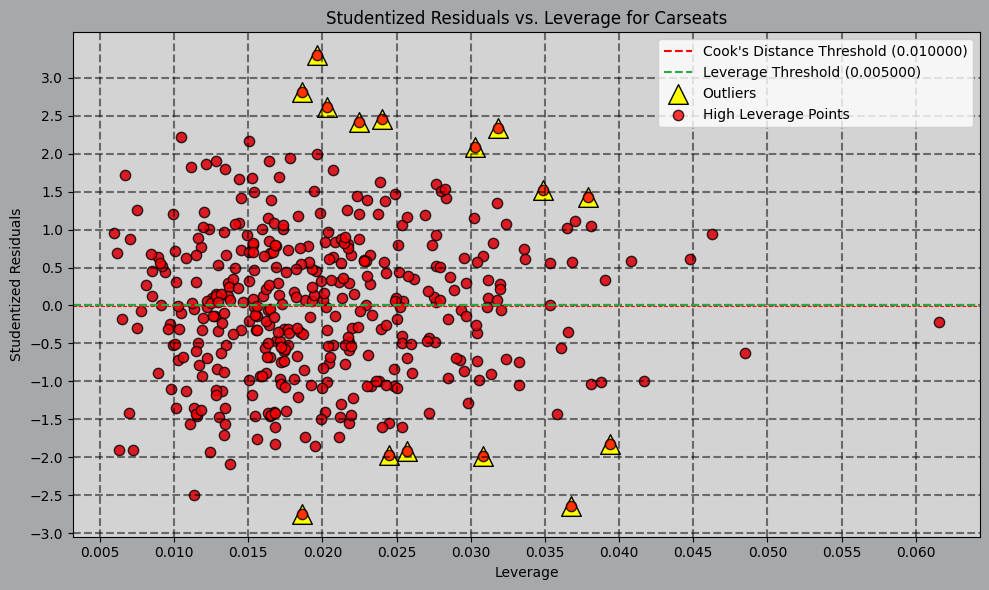

In [28]:
influence = modelCs.get_influence()
leverage = influence.hat_matrix_diag
cooks_distance = influence.cooks_distance[0]
studentized_residuals = influence.resid_studentized_internal

threshold_cooks = 4 / len(modelCs.resid)
print('Cook\'s Distance Threshold:', threshold_cooks)
threshold_leverage = 2 / len(Carseats)
print('Leverage Threshold:', threshold_leverage)

fig, axes = plt.subplots(figsize=(10, 6), facecolor='#A7A8AA') #Plot Axes Area Color
axes.set_facecolor('#D3D3D3')  # Plot Background Color

axes.scatter(leverage, studentized_residuals, alpha=0.75)

plt.axhline(y=threshold_cooks, color='red', linestyle='--', label=f'Cook\'s Distance Threshold ({threshold_cooks:.6f})')
plt.axhline(y=-threshold_cooks, color='red', linestyle='--', linewidth=0.75)
axes.axhline(y=threshold_leverage, color='#28A745', linestyle='--', label=f'Leverage Threshold ({threshold_leverage:.6f})')

axes.set_xlabel("Leverage")
axes.set_ylabel("Studentized Residuals")
axes.set_title("Studentized Residuals vs. Leverage for Carseats")
axes.grid(color='black', linestyle='--', linewidth=1.5, alpha=0.5)  

x_ticks = np.arange(0, 2.1, 0.005)  #x-ticks from 0 to +2.1, every 0.005 interval
y_ticks = np.arange(-7, 3.5, 0.5)  
axes.set_xticks(x_ticks)
axes.set_yticks(y_ticks)

outliers = np.where(cooks_distance > threshold_cooks)[0]
axes.scatter(leverage[outliers], studentized_residuals[outliers], color='yellow', marker='^',
             label='Outliers', edgecolor='black', s=200)
high_leverage = np.where(leverage > threshold_leverage)[0]
axes.scatter(leverage[high_leverage], studentized_residuals[high_leverage], color='red', edgecolor='black',
             label='High Leverage Points', alpha=0.8, s=55)

print('Outlier Indices:', outliers)
print('High Leverage Indices:', high_leverage)

plt.tight_layout()
plt.legend(loc='upper right') 

plt.show();

##### 11. In this problem we will investigate the $t-statistic$ for the null hypothesis $H_0$ : $β = 0$ in simple linear regression without an intercept. To begin, we generate a predictor $x$ and a response $y$ as follows.

```python
rng = np.random.default_rng(1)
x = rng.normal(size=100) 
y = 2 * x + rng.normal(size=100)
```

(a) Perform a simple linear regression of $y$ onto $x$, without an intercept. Report the coefcient estimate $βˆ$, the standard error of
this coefifcient estimate,and the *t*-statistics and *p*-values associatedd with the null hypothesis$H_0 : β = $0. Comment on these
results. (You can perform regression without an intercept using
the keywords argument intercept=False to ModelSpec().)


In [29]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
rdf = pd.DataFrame({'x': x, 'y': y}) 

X_ni= MS(['x'],intercept=False)
X_ni=X_ni.fit_transform(rdf)

model_ni = sm.OLS(y, X_ni).fit()

print(model_ni.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                    6.23e-31
Time:                        17:20:58   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

10a&b.) Since there are no intercepts, $x$ coefficient estimateis $1.9762$. The $p$-value is very small and close to $0$. $T$-statistics is 16.898 while $F$-statistics is 285.6



(b) Now perform a simple linear regression of x onto y with an
intercept, and report the coefcient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results.


In [30]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)
rdf = pd.DataFrame({'x': x, 'y': y}) 

X_ni = MS(['y'], intercept=False)  # 'y' is the independent variable now
X_ni = X_ni.fit_transform(rdf)

model_ni = sm.OLS(x, X_ni).fit()   # 'x' is the dependent variable now
print(model_ni.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                    6.23e-31
Time:                        17:20:58   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Regression of x onto y resulted in the same $R^2$ value of 0.743. We see the $t$-statistics' value as same when $p$-value is near zero. Coefficinent  for y(x) is 1.97 and x(y) is 0.3757. STD error for coefficient x is =0.117 and coefficient for y is =0.022. However, the relationship between these 2 coefficients when there is no intercept should be an inverse, or, $y=\beta_0*x$ or $\frac{1}x=y*\beta_x$. Or in our cases it would be $y = 2x$, then $x = \frac{1}{2}y$. 
The difference in our coefficient is due to the error being introduced. Below syntax reduced the error term (random no. generator) being reduced to a smaller term which demonstrates the $R^2=1$ and the cofficient of x and y being close to 2 and $\frac{1}{2}$, while the $t$-statistics remains the same. 

We learned from it's mathematical formula that $t$-statistics is a ratio of the estimated coefficient &#770;$\beta$ and the std error, $SE({\beta}\hat)$. Therefore, $t$-statistics remain the same for both y onto x and x onto y because of linear relationship and variance explained by the symetric larger $t$-statistics is observed with less std.error or less noise. 

10D.)
### Algebraic Derivation of the t-Statistic:

We are given that for a regression of $Y$ on $X$ without an intercept, the t-statistic for testing $H_0 : \beta = 0$ is of the form:

$$
t = \frac{\hat{\beta}}{SE(\hat{\beta})}
$$

where $\hat{\beta}$ is the estimated slope, and $SE(\hat{\beta})$ is the standard error of $\hat{\beta}$, given by:

$$
SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n \left( y_i - x_i \hat{\beta} \right)^2}{(n-1) \sum_{i=1}^n x_i^2}}
$$

Expanding the denominator, we aim to show algebraically that the t-statistic can be written as:

$$
t = \frac{(\sqrt{n-1}) \sum_{i=1}^n x_i y_i}{\sqrt{(\sum_{i=1}^n x_i^2)(\sum_{i=1}^n y_i^2) - (\sum_{i=1}^n x_i y_i)^2}}
$$

#### Step-by-Step Derivation:

Let's begin by expressing the coefficient $\hat{\beta}$:

$$
\hat{\beta} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}
$$

Substitute $\hat{\beta}$ into the formula for the standard error:

$$
SE(\hat{\beta}) = \sqrt{\frac{\sum_{i=1}^n \left( y_i - x_i \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2} \right)^2}{(n-1) \sum_{i=1}^n x_i^2}}
$$

After simplifications, this leads us to the final expression for the $t$-statistic:

$$
t = \frac{(\sqrt{n-1}) \sum_{i=1}^n x_i y_i}{\sqrt{(\sum_{i=1}^n x_i^2)(\sum_{i=1}^n y_i^2) - (\sum_{i=1}^n x_i y_i)^2}}
$$



In [31]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x +0.1*rng.normal(size=100)
rdf = pd.DataFrame({'x': x, 'y': y}) 

X_ni = MS(['x'],intercept=False)
X_ni = X_ni.fit_transform(rdf)

model_ni = sm.OLS(y, X_ni).fit()

model_ni.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.918e+04
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                   3.94e-124
Time:                        17:20:58   Log-Likelihood:                          88.908
No. Observations:                 100   AIC:                                     -175.8
Df Residuals:                      99   BIC:                                     -173.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              1.9976      0.012    170.812      0.000       1.974       2.021
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x +0.1*rng.normal(size=100)
rdf = pd.DataFrame({'x': x, 'y': y}) 


X_ni = MS(['y'], intercept=False)  # 'y' is the independent variable now
X_ni = X_ni.fit_transform(rdf)

model_ni = sm.OLS(x, X_ni).fit()   # 'x' is the dependent variable now
model_ni.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          2.918e+04
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                   3.94e-124
Time:                        17:20:58   Log-Likelihood:                          158.27
No. Observations:                 100   AIC:                                     -314.5
Df Residuals:                      99   BIC:                                     -311.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.4989      0.003    170.812      0.000       0.493       0.505
==============================================================================
Omnibus:                        2.410   Durbin-Watson:                   2.169
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.881
Skew:                          -0.183   Prob(JB):                        0.390
Kurtosis:                       3.564   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
x = rng.normal(size=100000)
y = rng.normal(size=100000)
n = len(x)

beta_h = np.sum(x*y)/np.sum(x**2)

residuals = np.sum((y-beta_h*x)**2)

SE = np.sqrt((residuals)/((n-1)*np.sum(x**2)))

print(f"t_stats = {
        beta_h / SE:.5f}")

print(f"t_hw = {
        (np.sqrt(n-1)*np.sum(x*y))/
                np.sqrt(np.sum(x**2)*np.sum(y**2)-
                            np.sum(x*y)**2):.5f}")


t_stats = 0.72049
t_hw = 0.72049


11.(f). In Python, show that when regression is performed with an intercept,
the $t$-statistic for $H0 : β1 = 0$ is the same for the regression of $y$
onto $x$ as it is for the regression of $x$ onto $y$

In [34]:
#11F y onto x regression WITH intercepts
rng = np.random.default_rng(1);
x = rng.normal(size=100);
y =  2 * x +0.001*rng.normal(size=100); 
1*rng.normal(size=100);
rdf = pd.DataFrame({'x': x, 'y': y}); 

X_yx= MS(['x'])
X_yx=X_yx.fit_transform(rdf)

X_xy= MS(['y'])
X_xy=X_xy.fit_transform(rdf)
    
model_yx = sm.OLS(y, X_yx).fit()
model_xy = sm.OLS(x, X_xy).fit()

#t_stat_y_on_x = model_yx.tvalues[1]  # The second element is the t-statistic for x
#t_stat_x_on_y = model_xy.tvalues[1]  # The second element is the t-statistic for y

# Print the results
#print(f"t-statistic for regression of y on x: {summarize(model_yx)}")
#print(f"t-statistic for regression of x on y: {summarize(model_xy)}")

12. This problem involves simple linear regression without an intercept.

(a) Recall that the coefficient estimate $\hatβ$ for the linear regression of $Y$ onto $X$ without an intercept is given by $(3.38)$. Under what
circumstance is the coefficient estimate for the regression of $X$
onto $Y$ the same as the coefcient estimate for the regression of
$Y$ onto $X$

*#12.(a).* When the coefficient estimates $\hat\beta$ in regression are equal, it falls under the condtions of when the variables are a constant multiple of each other such as: $$Y=kX$$, or, $$X=mY$$.  the coefficient estimates from the regression of 𝑌 onto 𝑋
 and from 𝑋 onto 𝑌 will be equal when there is a proportional relationship between the two variables. This is most clearly seen when one variable is a constant multiple of the other, particularly when that constant is either $+1$ or $−1$.


(b) Generate an example in Python with n = 100 observations in
which the coeffcient estimate for the regression of X onto Y
is *different* from the coefficient estimate for the regression of Y
onto X

In [35]:
#12.B)
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + x**2 + rng.normal(size=100)

model_yx = sm.OLS(y, x).fit()
model_xy = sm.OLS(x, y).fit()

print("Coefficient estimate for regression of y onto x:", summarize(model_yx))
print("Coefficient estimate for regression of x onto y:", summarize(model_xy))

Coefficient estimate for regression of y onto x:       coef  std err      t  P>|t|
x1  1.4159    0.189  7.496    0.0
Coefficient estimate for regression of x onto y:       coef  std err      t  P>|t|
x1  0.2557    0.034  7.496    0.0


c) Generate an example in Python with $n = 100$ observations in
which the coefficient estimate for the regression of $X$ onto $Y$ is
the *same* as the coefficient estimate for the regression of $Y$ onto
$X$.

In [36]:
#12.C)
n = 100

# Generate random data for X
x = np.random.randn(n)

y =  1.0*x+(6*10**-16) * x  


model_yx = sm.OLS(y, x).fit()
model_xy = sm.OLS(x, y).fit()

print(summarize(model_xy))
print(summarize(model_yx))
#print("Coefficient estimate for regression of y onto x:", summarize(model_yx))
#print("Coefficient estimate for regression of x onto y:", summarize(model_xy))

    coef       std err             t  P>|t|
x1   1.0  8.720000e-18  1.150000e+17    0.0
    coef       std err             t  P>|t|
x1   1.0  5.130000e-17  1.950000e+16    0.0


In this exercise you will create some simulated data and will ft simple
linear regression models to it. Make sure to use the default random
number generator with seed set to 1 prior to starting part (a) to
ensure consistent results. <br> (a) Using the normal() method of your random number generator, create a vector, $x$, containing 100 observations drawn from a $N(0, 1)$ distribution. This represents a feature, $X$.

In [37]:
rng=np.random.default_rng(1)
x=rng.normal(0,1,100)


(b) Using the ```normal() method```, create a vector, eps, containing 100
observations drawn from a $N(0, 0.25)$ distribution—a normal
distribution with mean zero and variance 0.25

In [38]:
rng=np.random.default_rng(1)
eps=rng.normal(0,0.25,100)

(c) Using $x$ and $eps$, generate a vector $y$ according to the model
$$Y = −1+0.5X + \epsilon.        \quad\ eq(3.39)$$

What is the length of the vector $y$? What are the values of 
$β_0$
and $β_1$ in this linear model?

In [39]:
rng = np.random.default_rng(1)
x   = rng.normal(0,1,100)
eps = rng.normal(0,0.25,100)
y   = -1+0.5*x+eps
ddf = pd.DataFrame({'x': x, 'y': y}) 
#print("Y:", y)
print("Length of vector y:", len(y))
print("B_0 = -1 and B_-1 =0.5")

Length of vector y: 100
B_0 = -1 and B_-1 =0.5


(d) Create a scatterplot displaying the relationship between $x$ and
$y$. Comment on what you observe.

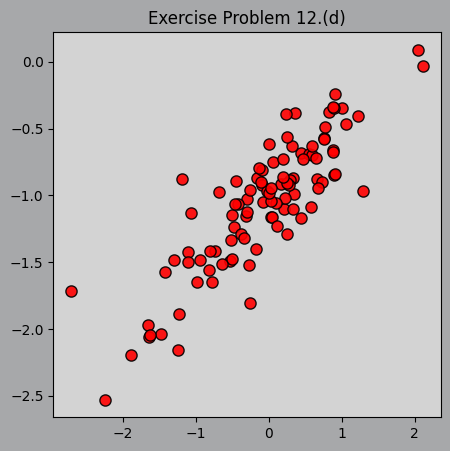

100
100


In [40]:
fig, axes = plt.subplots(figsize=(5, 5), facecolor='#A7A8AA') 

axes.set_facecolor('#D3D3D3') 

plt.scatter(x, y, alpha=0.9, color='red', edgecolor='black', s=65)
axes.set_title("Exercise Problem 12.(d)")
plt.show()

print(len(x))
print(len(y))
#From plot, we can see that there is a linear relationship between x and y. Some residual variance in the plot is observed as some points are fartgher from regression line. 

e) Fit a least squares linear model to predict $y$ using $x$. Comment
on the model obtained. How do $\hatβ_0$ and $\hatβ_1$ compare to $β_0$ and
$β_1$?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.74e-30
Time:                        17:20:59   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0190      0.025    -40.537      0.0

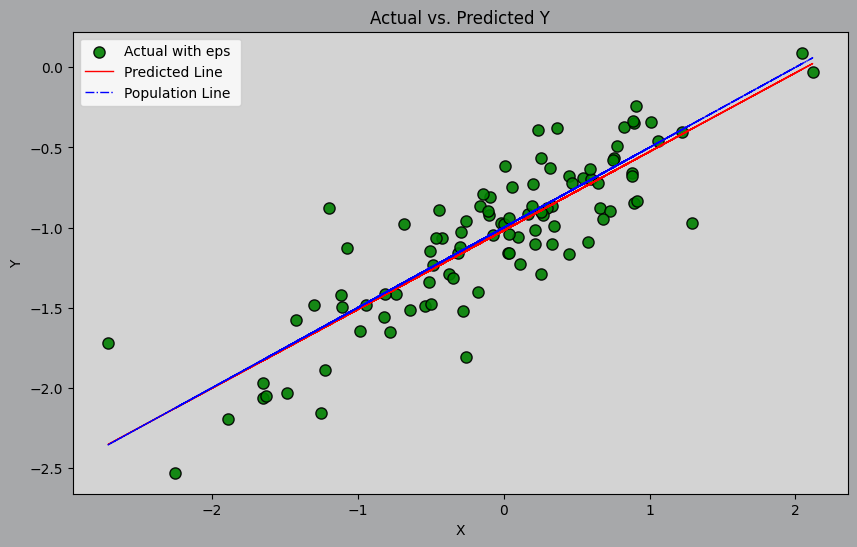

In [41]:
#13.(e).&(f).
fig, axes = plt.subplots(figsize=(10,6),facecolor='#A7A8AA') 
axes.set_facecolor('#D3D3D3') 

y  = -1 + 0.5*x + eps
yp = -1 + 0.5*x       # Plot with no eps
X  =  MS(['x']).fit_transform(ddf)

model_yx    = sm.OLS(y, X).fit()
predicted_y = model_yx.predict(X)
model_yxp   =sm.OLS(predicted_y,X).fit()
print(model_yx.summary())

axes.scatter(x, y, alpha=0.9, color='green', label='Actual with eps ',edgecolor='black', s=65)
#axes.scatter(x, predicted_y, alpha=0.9, color='Yellow', label='Predicted ',edgecolor='black', s=65)

plt.plot(x, predicted_y, color='red', linewidth=1., label='Predicted Line')
plt.plot(x,yp, color='Blue',linestyle='dashdot',linewidth=1., label='Population Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Y')
plt.legend()

plt.show()

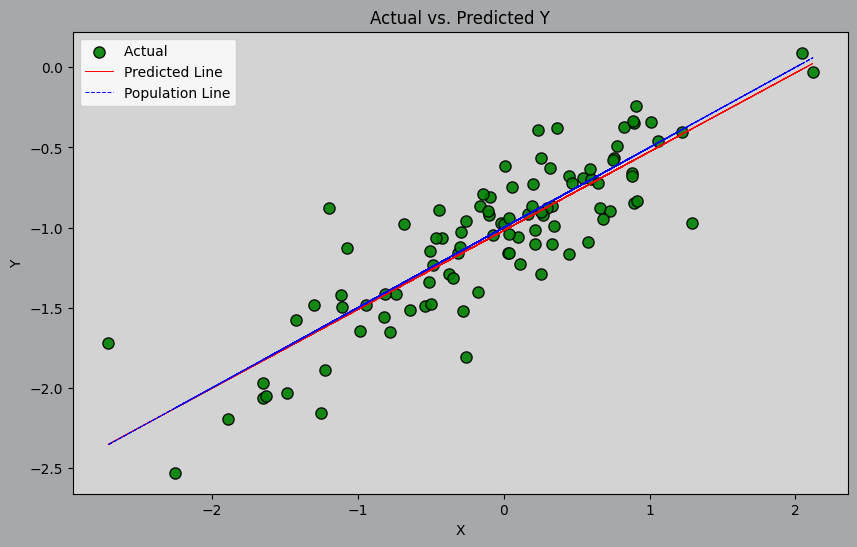

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.74e-30
Time:                        17:20:59   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0190      0.025    -40.537      0.0

In [42]:
#13.(g).
fig, axes = plt.subplots(figsize=(10,6),facecolor='#A7A8AA') 
axes.set_facecolor('#D3D3D3') 
y  = -1+0.5*x + eps
yp = -1+0.5*x       # Plot with no eps

xms= MS(['x']).fit_transform(ddf)
XP = MS([poly('x', degree=2)]).fit_transform(ddf) #Orthogonal Polynomials vs Standard fit

model_yx   = sm.OLS(y, X).fit()
model_yxpo = sm.OLS(y,XP).fit()

axes.scatter(x, y, alpha=0.9, color='green', label='Actual ',edgecolor='black', s=65)
#axes.scatter(x, predicted_ypo, alpha=0.9, color='#DC143C', label='Predicted, Poly X^2 ',edgecolor='black', s=25)

plt.plot(x, predicted_y, color='red', linewidth=0.7, label='Predicted Line')
plt.plot(x,yp, color='Blue',linestyle='dashed',linewidth=0.75, label='Population Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Y')
plt.legend()

plt.show();

print(model_yx.summary())
print(model_yxpo.summary())


13.(g). Using a poly regression fit, it is observed that coefficient $\hat\beta_0$ is a lot further than the results from with just the 1st power. P-value for $\hat\beta_2$, given a 96% that the null hypothesis for the quadratic term is true. Also, $\hat\beta_1$ is also deviating from true value further than predicted values made from linear regression. *Note: Polynomial Regression done with Orthogonal Polynomials, we cannot directly compare Standard Fit and Othogonal Polynomial Fit `(MS()`)*

h). Repeat (a)–(f) after modifying the data generation process in
such a way that there is less noise in the data. The model (3.39)
should remain the same. You can do this by decreasing the variance of the normal distribution used to generate the error term
" in (b). Describe your results.

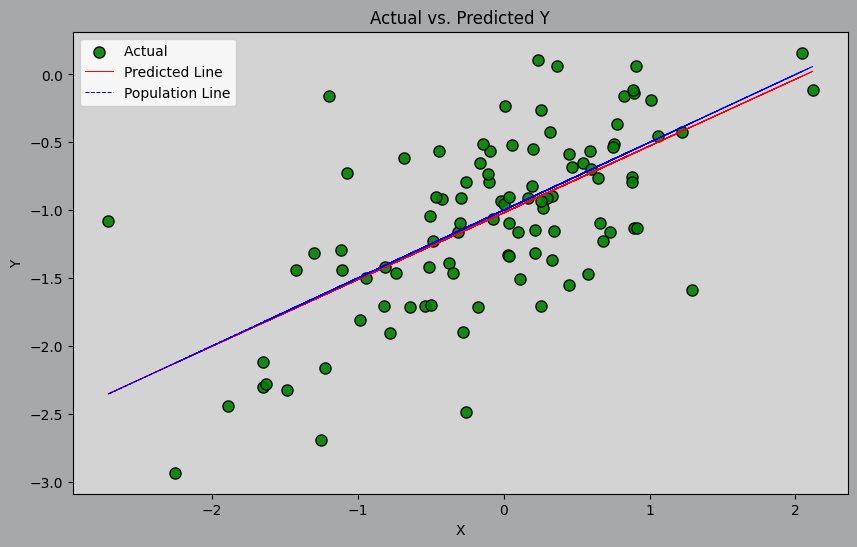

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     67.79
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           8.04e-13
Time:                        17:20:59   Log-Likelihood:                -71.745
No. Observations:                 100   AIC:                             147.5
Df Residuals:                      98   BIC:                             152.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0380      0.050    -20.647      0.0

In [43]:
#13.(h)

fig, axes = plt.subplots(figsize=(10,6),facecolor='#A7A8AA') 
axes.set_facecolor('#D3D3D3') 

rng = np.random.default_rng(1)
x = rng.normal(0, 1, 100)
eps = rng.normal(0, 0.5, 100)  #Lower Variance 
y  = -1+0.5*x + eps           
yp = -1+0.5*x                 # Plot with no eps

xms= MS(['x']).fit_transform(ddf)
XP = MS([poly('x', degree=2)]).fit_transform(ddf) 
model_yx   = sm.OLS(y, X).fit()
model_yxpo = sm.OLS(y,XP).fit()

axes.scatter(x, y, alpha=0.9, color='green', label='Actual ',edgecolor='black', s=65)

plt.plot(x, predicted_y, color='red', linewidth=0.7, label='Predicted Line')
plt.plot(x,yp, color='Blue',linestyle='dashed',linewidth=0.75, label='Population Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Y')
plt.legend()

plt.show()

print(model_yx.summary())

13.(h). Lowering variance via `rng.normal()`, resulted in an increase in the $t$-statistics value. $R^2$ increased when we lowered the random errors.

i). Repeat (a)–(f) after modifying the data generation process in
such a way that there is more noise in the data. The model
(3.39) should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term " in (b). Describe your results.

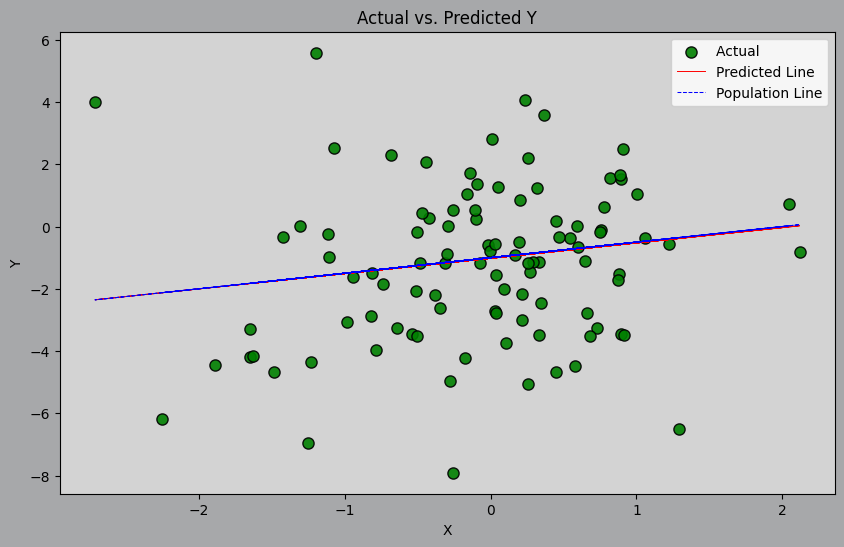

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     2.054
Date:                Mon, 07 Oct 2024   Prob (F-statistic):              0.155
Time:                        17:20:59   Log-Likelihood:                -232.69
No. Observations:                 100   AIC:                             469.4
Df Residuals:                      98   BIC:                             474.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.1901      0.251     -4.734      0.0

In [44]:
#13.(i)

fig, axes = plt.subplots(figsize=(10,6),facecolor='#A7A8AA') 
axes.set_facecolor('#D3D3D3') 

rng = np.random.default_rng(1)
x = rng.normal(0, 1, 100)
eps = rng.normal(0, 2.5, 100)  #Increasing Variance 
y  = -1+0.5*x + eps           
yp = -1+0.5*x                 # Plot with no eps

xms= MS(['x']).fit_transform(ddf)
XP = MS([poly('x', degree=2)]).fit_transform(ddf) 

model_yx   = sm.OLS(y, X).fit()
model_yxpo = sm.OLS(y,XP).fit()

axes.scatter(x, y, alpha=0.9, color='green', label='Actual ',edgecolor='black', s=65)

plt.plot(x, predicted_y, color='red', linewidth=0.7, label='Predicted Line')
plt.plot(x,yp, color='Blue',linestyle='dashed',linewidth=0.75, label='Population Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Actual vs. Predicted Y')
plt.legend()

plt.show()

print(model_yx.summary())

13.(i).This time, with an increasing factor of 2.5 for the variance ,$\epsilon$, $R^2$ value dropped dramatically and $t$-statistics decreases. The values of the coefficients estimates are deviating from true coefficients values. 

(j) What are the confdence intervals for β0 and β1 based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

The confidence intervals of the model with less noise and ranges closer to the true coefficient values vs the intervals of more noise.

14. This problem focuses on the collinearity problem.
(a) Perform the following commands in Python:

```Python
rng = np.random.default_rng(10) 
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
```
The last line corresponds to creating a linear model in which $y$ is
a function of $x_1$ and $x_2$. Write out the form of the linear model.
What are the regression coefficients?

14.(a).

$ Y=\beta_0+\beta_1*x_1+\beta_2+\epsilon $,  $\quad\beta_0=2, \beta_1=2, \beta+2=0.3$


Correlations of x1 and x2:           x1        x2
x1  1.000000  0.772324
x2  0.772324  1.000000


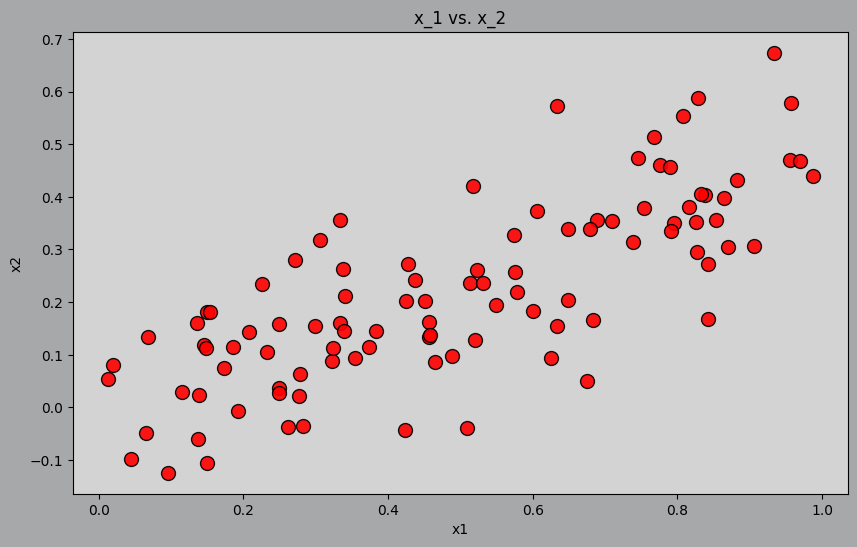

In [45]:
rng = np.random.default_rng(10) 
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

dfn=pd.DataFrame({'x1':x1,'x2':x2})
print("Correlations of x1 and x2:",dfn.corr())

fig, axes = plt.subplots(figsize=(10,6),facecolor='#A7A8AA') 
axes.set_facecolor('#D3D3D3') 

axes.scatter(x1,x2, alpha=0.9, color='red',edgecolor='black', s=100)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x_1 vs. x_2')
plt.show()




In [46]:
#14.(c).
rng = np.random.default_rng(10) 
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

X= MS(['x1','x2']).fit_transform(dfn)

modelc   = sm.OLS(y, X).fit()
print(modelc.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           5.76e-08
Time:                        17:21:00   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.0

$\hat\beta_0=1.9579, \hat\beta_1=1.6154, \hat\beta_2=0.9428$. Null hypothesis can be rejected for $\hat\beta_0$, and for $\hat\beta_1$, the null hypothesis can also be rejected, however we can see the larger confidence interval that ranges from 0.569 to 2.661. As for $\hat\beta_2$, $p$-value is 0.259, which is case for null hypothesis, showing that $\hat\beta_2$ is not statistically significant in analysis.

In [47]:
#14.(d).
dfn = pd.DataFrame({'x1':x1,'x2':x2})
X = MS(['x1']).fit_transform(dfn)

modeld   = sm.OLS(y, X).fit()
print(modeld.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.37e-08
Time:                        17:21:00   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.0

With only $x_1$ in OLS fit, $p$-value is zero. The null hypothesis can be rejected for $\hat\beta_1$.


In [48]:
#14.(e).
dfn = pd.DataFrame({'x1':x1,'x2':x2})
X = MS(['x2']).fit_transform(dfn)

modele   = sm.OLS(y, X).fit()
print(modele.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           7.43e-07
Time:                        17:21:00   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.0

P-value for ceofficient estimate $\hat\beta_1$ is zero, and the null hypothesis is rejected.

In part b, a strong linear relationship between $x_1$ and $x_2$ is found. However, when we isolated either one of the independent variables, $x_1$ or $x_2$, strong evidence of rejection of null hypothesis was found. This suggests that this model consists of behaviors of multicollinearity. This occures when the independent variables are highly correlated to one another, making it difficult to determine their unique effects on the model.

In [49]:
#14.(g).
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y  = np.concatenate([y, [6]])

dfn=pd.DataFrame({'x1':x1,'x2':x2})
X = MS(['x1','x2']).fit_transform(dfn)

model12 = sm.OLS(y, X).fit()
print(model12.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           4.60e-08
Time:                        17:21:00   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.0

$\hat\beta_0=2.1613, \hat\beta_1=0.1316, \hat\beta_2=3.5341$. Null hypothesis can be rejected for $\hat\beta_0$, and for $\hat\beta_2$, the null hypothesis can also be rejected, however we can see the larger confidence interval that ranges from 0.569 to 2.661. As for $\hat\beta_1$, $p$-value is 0.732, which is a case for null hypothesis, showing that $\hat\beta_1$ is not statistically significant in analysis.

In [50]:
dfn = pd.DataFrame({'x1':x1,'x2':x2})
X = MS(['x1']).fit_transform(dfn)

model1 = sm.OLS(y, X).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           9.23e-07
Time:                        17:21:00   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.0

In [51]:
X = MS(['x2']).fit_transform(dfn)

model2 = sm.OLS(y, X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           3.13e-08
Time:                        17:21:00   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.0

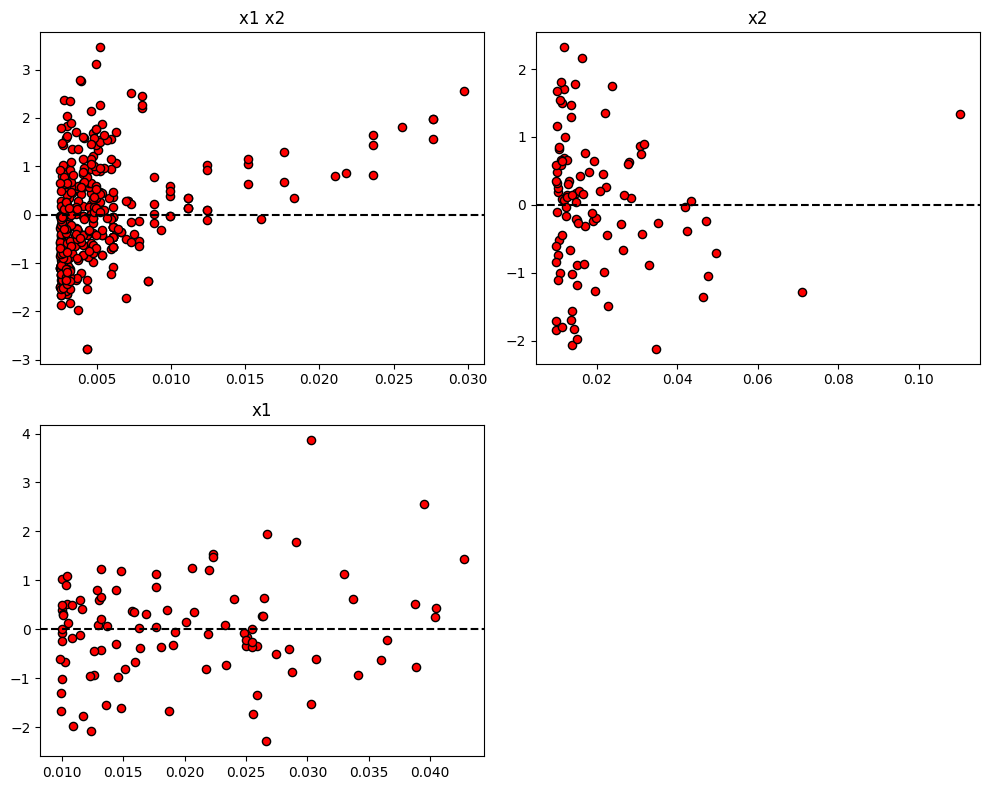

In [52]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

influence  = model.get_influence()
influence1 = model1.get_influence()
influence2 = model2.get_influence()

leverage  = influence.hat_matrix_diag
leverage1 = influence1.hat_matrix_diag
leverage2 = influence2.hat_matrix_diag

residuals  = model.resid
residuals1 = model1.resid
residuals2 = model2.resid

std_resid  = influence.resid_studentized_internal
std_resid1 = influence1.resid_studentized_internal
std_resid2 = influence2.resid_studentized_internal

axes[0, 0].scatter(leverage, std_resid, color='red',edgecolor='black', s=35) 
axes[1, 0].scatter(leverage1, std_resid1,color='red',edgecolor='black', s=35) 
axes[0, 1].scatter(leverage2, std_resid2, color='red',edgecolor='black', s=35)   
axes[1, 1].axis('off')  # Hide the empty subplot

axes[0,0].axhline(y=0, color='black', linestyle='--')
axes[1,0].axhline(y=0, color='black', linestyle='--')
axes[0,1].axhline(y=0, color='black', linestyle='--')

# Set titles and labels for each subplot
axes[0, 0].set_title("x1 x2")
axes[0, 1].set_title("x2")
axes[1, 0].set_title("x1")

plt.tight_layout()
plt.show()

##### 14.(g). 
For this exercise, it is noted that the $Y$-axis of these plots demonstrates the data of `Studentized Residuals` and the $X$-axis are for `Leverage`. For plot of $x_1$, a huge proportion of the points shown high Leverage without being Outliers. Also, it is evident that the points are well-dispersed away from one another. As for $x_2$, some data points of extreme high Leverage is shown, with points dispersed across the full range of the $Y$-axis (Outliers). For $x_1$ & $x_2$ plot, significant number of points are closely clustered near the origin and some high Leverage and Outliers points are noted.

In [101]:
#15.(a)
Boston = load_data("Boston")
y = Boston['crim'] 
unicoeffs=[]
for predictor in Boston.columns:

    if predictor != 'crim':
        print(f"Fitting model for predictor: {predictor}")
        
        X = MS([predictor]).fit_transform(Boston[[predictor]])  
        model = sm.OLS(y, X).fit()
        
        unicoeffs.append(model.params[predictor]) 
        
        print(model.summary())
        print("\n" + "x"*100 + "\n")


Fitting model for predictor: zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     21.10
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           5.51e-06
Time:                        17:53:18   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3596.
Df Residuals:                     504   BIC:                             3604.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.453

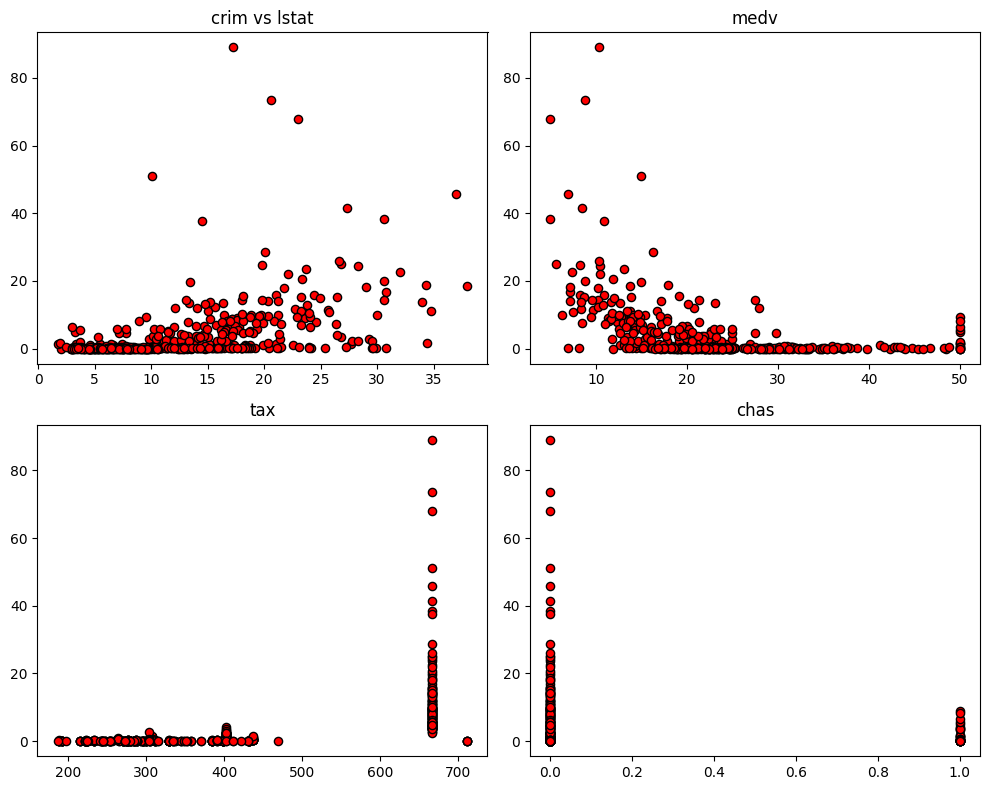

In [89]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

Xzn  =  MS(['lstat'],intercept=False).fit_transform(Boston)
Xag  =  MS(['tax'],intercept=False).fit_transform(Boston)
Xls  =  MS(['medv'],intercept=False).fit_transform(Boston)
Xch  =  MS(['chas'],intercept=False).fit_transform(Boston)

axes[0, 0].scatter(Xzn, y, color='red',edgecolor='black', s=35) 
axes[1, 0].scatter(Xag, y, color='red',edgecolor='black', s=35)   
axes[0, 1].scatter(Xls, y, color='red',edgecolor='black', s=35)   
axes[1, 1].scatter(Xch, y, color='red',edgecolor='black', s=35) 

# Set titles and labels for each subplot
axes[0, 0].set_title("crim vs lstat")
axes[1, 0].set_title("tax")
axes[0, 1].set_title("medv")
axes[1, 1].set_title("chas")

plt.tight_layout()
plt.show()

##### 15.(a) 
Least Square Fit of all predictors demonstrated that only predictor that is statistically insignificant is `'chas'`, with a $p$-value of 0.209. 

In [104]:
#15.(b)
B_all=list(Boston.columns.drop('crim'))

X_mb = MS(B_all).fit_transform(Boston)

model_mb = sm.OLS(y, X_mb).fit()
mcoeffs = model_mb.params[1:]

print(model_mb.summary())


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           2.03e-56
Time:                        17:54:19   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.0

##### 15.(b)
From the multiple regression model, the $R^2$ value is greater than any of model from the previouos modeling. The $p$-values for several of the predictors indicated for null hypothesis, with,` 'zn', 'dis','rad',`and `'medv' `that can be considered as statistically significant. 

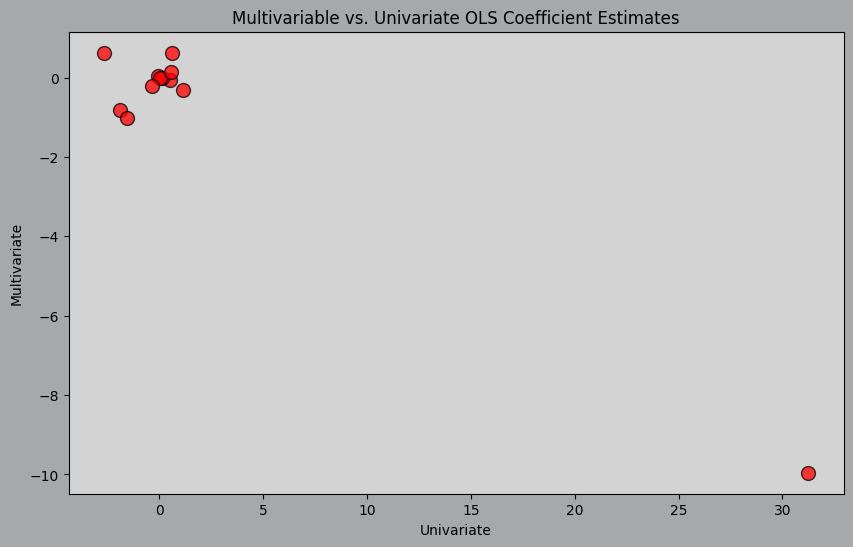

In [105]:
#15.(c)
fig, axes = plt.subplots(figsize=(10,6),facecolor='#A7A8AA') 
axes.set_facecolor('#D3D3D3') 

axes.scatter(unicoeffs, mcoeffs, alpha=0.75, marker='o',color='red', label='Actual with eps ',edgecolor='black', s=100)

plt.xlabel('Univariate')
plt.ylabel('Multivariate')
plt.title('Multivariable vs. Univariate OLS Coefficient Estimates')

plt.show()

In [ ]:
correlation_matrix = Boston.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='magma', linewidths=0.75)

plt.title('Correlation Matrix')

plt.show()

print(f"Correlation matrix for Boston Predictors:\n{correlation_matrix}")


In [140]:
Boston = load_data("Boston")
y = Boston['crim'] 

for predictor in Boston.columns:
    if predictor != 'crim':
        print(f"Fitting model for predictor: {predictor}")
        
        XP = MS([poly(predictor, degree=3)]).fit_transform(Boston[[predictor]])  # Polynomial transformation
        
        model = sm.OLS(y, XP).fit()  # No need for add_constant as it seems MS() handles it
        
        b0=model.params.iloc[0]
        b1=model.params.iloc[1]
        b2=model.params.iloc[2]
        b3=model.params.iloc[3]
        print(model.summary())

        print("\n"+ f"Equation for: {predictor}")
        print("Y=",b0,"+",b1,"*x+",b2,"*x^2 +",b3,"*x^3")

        print("\n" + "=+" * 55 + "\n")



Fitting model for predictor: zn
                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     10.35
Date:                Mon, 07 Oct 2024   Prob (F-statistic):           1.28e-06
Time:                        18:40:37   Log-Likelihood:                -1791.2
No. Observations:                 506   AIC:                             3590.
Df Residuals:                     502   BIC:                             3607.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

#### 15.(d)

From the univariate polyfit regression analysis, predictors `'indus','nox','rm','age','dis','rad','tax','ptratio','lstat','medv'` showed strong linear relationships when the $p$-values of the coefficient estimates are examined. 